In [238]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Increasing the columns views limit

pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

In [167]:
# Read the data

df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [169]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [170]:
# check whether there are any duplicates
df.duplicated().sum()

0

In [171]:
df.shape

(9240, 37)

In [172]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

## Replacing SELECT category with null values

In [175]:
#New dataframe containing columns of object dtype

df_obj = df.select_dtypes(include = 'object')

s = lambda x : x.str.contains('Select',na = False)
l = df_obj.columns[df_obj.apply(s).any()].tolist()
print(l)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [176]:
# Select all columns which have 'Select' entry

sel_cols = ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']

# replace values

df[sel_cols] = df[sel_cols].replace('Select', np.NaN)

## Handle null values and sales generated columns

- Given there are a number of columns with very high number of null entries, let's calculate the percentage of null values in each column, and take a decision from there.
- Furthermore, we can also drop Sales generated columns because those are the data entries that are made after the sales team has connected with the student. Those data have no bearing to the purpose of our model ie. providing lead score. The columns are
    * `tags`
    * `lead_quality`
    * all `asymmetrique` columns
    * `last_activity`
    * `last_notable_activity`

In [264]:
scaler = StandardScaler()

X_train[['total_visits','time_on_website','page_views_per_visit']] = scaler.fit_transform(
    X_train[['total_visits','time_on_website','page_views_per_visit']])

X_train.head()

,lead_number,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
1871,641410,0,-1.02,-0.89,-1.18,0,0,0,0,1,0,0,0,0,1,1,0,0,0
6795,597687,0,0.21,0.01,-0.50,1,1,0,0,0,0,0,0,0,1,1,0,1,0
3516,626825,0,0.51,-0.69,0.09,0,0,0,0,1,0,0,0,1,0,1,0,0,0
8105,587928,0,0.51,1.37,1.36,0,1,0,1,0,0,0,0,1,0,1,0,0,0
3934,622366,0,-1.02,-0.89,-1.18,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In [265]:
# checking the conversion rate

conversion = (sum(df['converted'])/len(df['converted'].index))*100
conversion

38.53896103896104

The conversion rate is 38.5%

## Looking at correlations

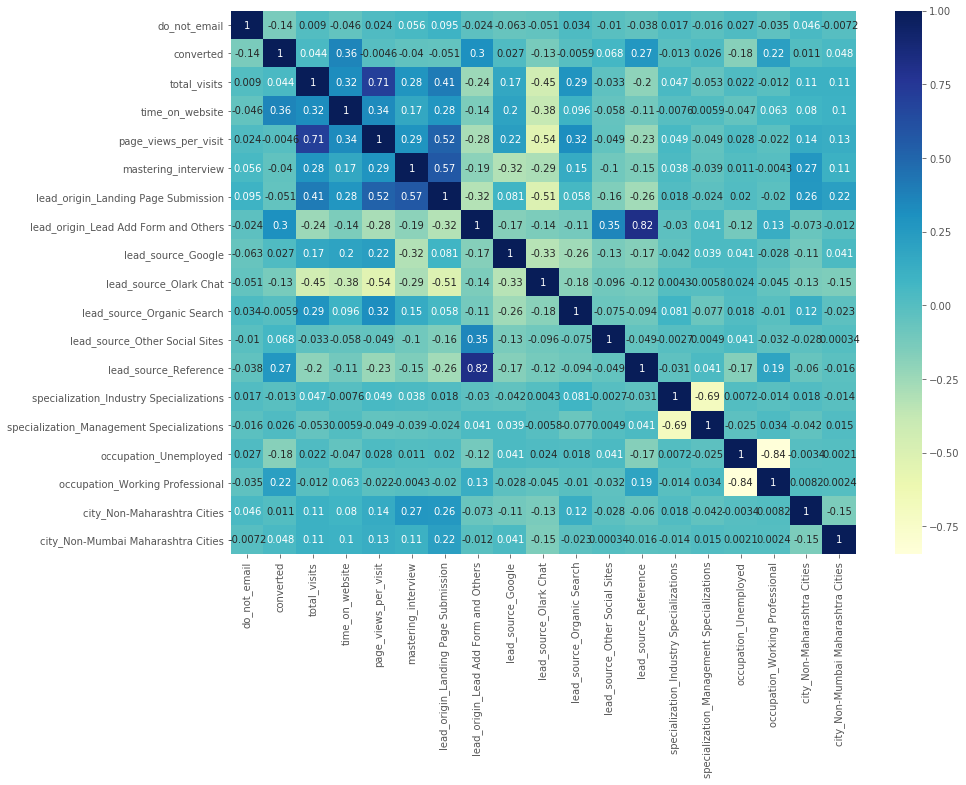

In [266]:
# Let's see the correlation matrix 

plt.figure(figsize = (14,10))       
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
plt.show()

### Drop highly correlated dummy variables

In [267]:
X_test.drop(['lead_origin_Lead Add Form and Others', 'specialization_Industry Specializations', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

X_train.drop(['lead_origin_Lead Add Form and Others', 'specialization_Industry Specializations', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

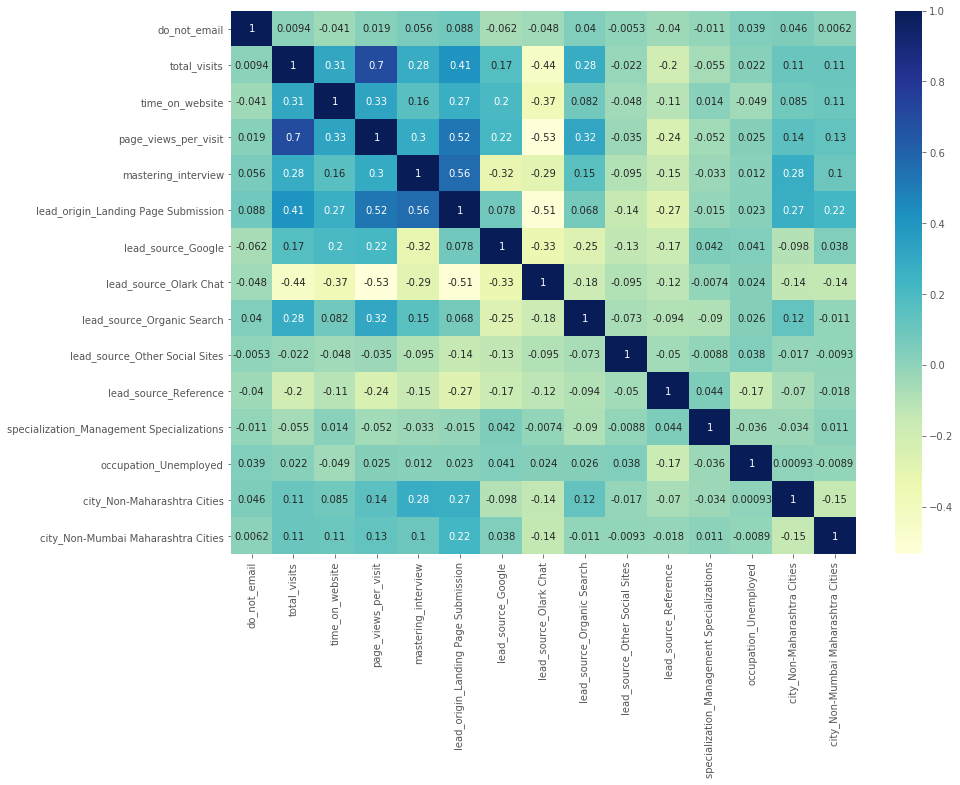

In [268]:
## lets check the correlation matrix again

plt.figure(figsize = (14,10))       
sns.heatmap(X_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

## Model Building

### Model 1: All variables

In [270]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

## Feature selection using RFE

In [239]:
# initiate logistic regression

logreg = LogisticRegression()

# initiate rfe

rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [240]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True])

In [241]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('do_not_email', True, 1),
 ('total_visits', True, 1),
 ('time_on_website', True, 1),
 ('page_views_per_visit', True, 1),
 ('mastering_interview', False, 2),
 ('lead_origin_Landing Page Submission', True, 1),
 ('lead_source_Google', True, 1),
 ('lead_source_Olark Chat', True, 1),
 ('lead_source_Organic Search', True, 1),
 ('lead_source_Other Social Sites', True, 1),
 ('lead_source_Reference', True, 1),
 ('specialization_Management Specializations', False, 3),
 ('occupation_Unemployed', True, 1),
 ('city_Non-Maharashtra Cities', True, 1),
 ('city_Non-Mumbai Maharashtra Cities', True, 1)]

In [242]:
# assign columns

col = X_train.columns[rfe.support_]

In [243]:
# check what columns were not selected by RFE

X_train.columns[~rfe.support_]

Index(['mastering_interview', 'specialization_Management Specializations'], dtype='object')

## Model 2: Assessing the model with statsmodel

In [244]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3295.0
Date:                Sun, 08 Aug 2021   Deviance:                       6590.0
Time:                        19:07:40   Pearson chi2:                 6.69e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.2716      0.125     -2.171      0.030      -0.517      -0.026
do_not_email                           -1.2116      0.144     -8.389      0.000      -1.495      -0.929
total_visits                            0.1426      0.042      3.426      0.001       0.061       0.224
time_on_website                         1.0406      0.036     29.196      0.000       0.971       1.110
page_views_per_visit                   -0.1918      0.048     -3.954      0.000      -0.287      -0.097
lead_origin_Landing Page Submission    -0.0787      0.091     -0.860      0.390      -0.258       0.101
lead_source_Google                      0.4008      0.086      4.649      0.000       0.232       0.570
lead_source_Olark Chat                  0.6855      0.132      5.204      0.000       0.427       0.944
lead_source_Organic Search              0.2332      0.115      2.034      0.042       0.008       0.458
lead_source_Other Social Sites          1.6324      0.171      9.545      0.000       1.297       1.968
lead_source_Reference                   3.9468      0.218     18.134      0.000       3.520       4.373
occupation_Unemployed                  -0.9219      0.086    -10.705      0.000      -1.091      -0.753
city_Non-Maharashtra Cities             0.2753      0.098      2.810      0.005       0.083       0.467
city_Non-Mumbai Maharashtra Cities      0.2161      0.094      2.290      0.022       0.031       0.401
=======================================================================================================
"""

In [245]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,occupation_Unemployed,5.24
5,lead_origin_Landing Page Submission,4.44
11,specialization_Management Specializations,3.22
4,mastering_interview,2.76
3,page_views_per_visit,2.57
6,lead_source_Google,2.42
7,lead_source_Olark Chat,2.41
1,total_visits,2.03
8,lead_source_Organic Search,1.46
13,city_Non-Maharashtra Cities,1.34


VIFs seem to be in a decent range except for three variables. 

Let's first drop the variable `occupation_Unemployed` since it has a high p-value as well as a high VIF.

In [246]:
X_train.drop('occupation_Unemployed', axis = 1, inplace = True)

In [247]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3352.4
Date:                Sun, 08 Aug 2021   Deviance:                       6704.8
Time:                        19:20:12   Pearson chi2:                 6.61e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -1.0492      0.122     -8.629      0.000      -1.288      -0.811
do_not_email                                 -1.2278      0.143     -8.563      0.000      -1.509      -0.947
total_visits                                  0.1398      0.041      3.382      0.001       0.059       0.221
time_on_website                               1.0499      0.035     29.617      0.000       0.980       1.119
page_views_per_visit                         -0.1782      0.048     -3.723      0.000      -0.272      -0.084
mastering_interview                          -0.0293      0.093     -0.314      0.754      -0.212       0.154
lead_origin_Landing Page Submission          -0.0679      0.094     -0.722      0.470      -0.252       0.117
lead_source_Google                            0.3466      0.099      3.493      0.000       0.152       0.541
lead_source_Olark Chat                        0.6834      0.135      5.047      0.000       0.418       0.949
lead_source_Organic Search                    0.1918      0.115      1.673      0.094      -0.033       0.416
lead_source_Other Social Sites                1.5304      0.173      8.826      0.000       1.191       1.870
lead_source_Reference                         4.0893      0.219     18.671      0.000       3.660       4.519
specialization_Management Specializations     0.0233      0.068      0.343      0.732      -0.110       0.156
city_Non-Maharashtra Cities                   0.2726      0.098      2.795      0.005       0.081       0.464
city_Non-Mumbai Maharashtra Cities            0.2274      0.094      2.428      0.015       0.044       0.411
=============================================================================================================
"""

The variable `mastering_interview	` also needs to be dropped.

In [248]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,lead_origin_Landing Page Submission,4.06
11,specialization_Management Specializations,3.07
4,mastering_interview,2.64
3,page_views_per_visit,2.56
1,total_visits,2.03
6,lead_source_Google,1.89
7,lead_source_Olark Chat,1.89
12,city_Non-Maharashtra Cities,1.34
8,lead_source_Organic Search,1.31
13,city_Non-Mumbai Maharashtra Cities,1.28


In [249]:
X_train.drop('mastering_interview', axis = 1, inplace = True)

In [ ]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

In [251]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,specialization_Management Specializations,2.99
4,lead_origin_Landing Page Submission,2.72
3,page_views_per_visit,2.55
1,total_visits,2.01
6,lead_source_Olark Chat,1.88
5,lead_source_Google,1.60
11,city_Non-Maharashtra Cities,1.32
7,lead_source_Organic Search,1.30
12,city_Non-Mumbai Maharashtra Cities,1.28
9,lead_source_Reference,1.26


The variable specialization_Management Specializations also needs to be dropped.

In [252]:
X_train.drop('specialization_Management Specializations', axis = 1, inplace = True)

In [253]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3352.5
Date:                Sun, 08 Aug 2021   Deviance:                       6705.0
Time:                        19:27:09   Pearson chi2:                 6.61e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.0454      0.102    -10.287      0.000      -1.245      -0.846
do_not_email                           -1.2268      0.143     -8.561      0.000      -1.508      -0.946
total_visits                            0.1382      0.041      3.360      0.001       0.058       0.219
time_on_website                         1.0500      0.035     29.629      0.000       0.981       1.119
page_views_per_visit                   -0.1782      0.048     -3.726      0.000      -0.272      -0.084
lead_origin_Landing Page Submission    -0.0762      0.090     -0.843      0.399      -0.253       0.101
lead_source_Google                      0.3630      0.085      4.265      0.000       0.196       0.530
lead_source_Olark Chat                  0.6939      0.130      5.325      0.000       0.439       0.949
lead_source_Organic Search              0.1950      0.113      1.726      0.084      -0.026       0.416
lead_source_Other Social Sites          1.5417      0.169      9.135      0.000       1.211       1.872
lead_source_Reference                   4.1022      0.216     19.026      0.000       3.680       4.525
city_Non-Maharashtra Cities             0.2685      0.097      2.772      0.006       0.079       0.458
city_Non-Mumbai Maharashtra Cities      0.2278      0.094      2.432      0.015       0.044       0.411
=======================================================================================================
"""

In [254]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,page_views_per_visit,2.54
4,lead_origin_Landing Page Submission,2.15
1,total_visits,2.01
6,lead_source_Olark Chat,1.54
5,lead_source_Google,1.32
10,city_Non-Maharashtra Cities,1.32
11,city_Non-Mumbai Maharashtra Cities,1.27
7,lead_source_Organic Search,1.25
2,time_on_website,1.23
9,lead_source_Reference,1.12


The variable `lead_origin_Landing Page Submission` also needs to be dropped.

In [255]:
X_train.drop('lead_origin_Landing Page Submission', axis = 1, inplace = True)

In [256]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3352.8
Date:                Sun, 08 Aug 2021   Deviance:                       6705.7
Time:                        19:28:52   Pearson chi2:                 6.61e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.1084      0.069    -16.042      0.000      -1.244      -0.973
do_not_email                          -1.2298      0.143     -8.586      0.000      -1.511      -0.949
total_visits                           0.1372      0.041      3.337      0.001       0.057       0.218
time_on_website                        1.0501      0.035     29.635      0.000       0.981       1.120
page_views_per_visit                  -0.1873      0.047     -4.014      0.000      -0.279      -0.096
lead_source_Google                     0.3880      0.080      4.864      0.000       0.232       0.544
lead_source_Olark Chat                 0.7474      0.114      6.557      0.000       0.524       0.971
lead_source_Organic Search             0.2260      0.107      2.115      0.034       0.017       0.435
lead_source_Other Social Sites         1.5951      0.156     10.193      0.000       1.288       1.902
lead_source_Reference                  4.1565      0.206     20.197      0.000       3.753       4.560
city_Non-Maharashtra Cities            0.2504      0.094      2.652      0.008       0.065       0.436
city_Non-Mumbai Maharashtra Cities     0.2122      0.092      2.313      0.021       0.032       0.392
======================================================================================================
"""

All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

In [257]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,page_views_per_visit,2.44
1,total_visits,2.01
5,lead_source_Olark Chat,1.52
2,time_on_website,1.23
6,lead_source_Organic Search,1.23
4,lead_source_Google,1.14
8,lead_source_Reference,1.12
10,city_Non-Mumbai Maharashtra Cities,1.12
9,city_Non-Maharashtra Cities,1.11
0,do_not_email,1.06


## Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [269]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred

ValueError: shapes (6468,17) and (14,) not aligned: 17 (dim 1) != 14 (dim 0)